<a href="https://colab.research.google.com/github/YashSharma79/bayesian_inference/blob/main/bayesian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

b) Suppose you were given samples x1, . . . , xn, and were told that they were either generated via the above scheme, or they were generated with X ∼ N (0, 5). Given this data, and the natural priors, what would the probability be that they were generated by the original scheme?
<br>
P(distribution | sample) = P(sample | distribution) * P(distribution) / P(sample)

P(distribution) = Unif(0,1) = Prior<br>
P(sample | distribution) = (MarginalPDF1(sample))<br>
P(sample) = MarginalPDF1(sample) + MarginalPDF2(sample)**


c) Generate an (estimated) plot of ‘average probability the original scheme is correct vs number of samples n’, when the data is generated by the original scheme.

The original scheme is correct means that X is distributed 1/2 times with N(0,1) and 1/2 times with N(0,9)

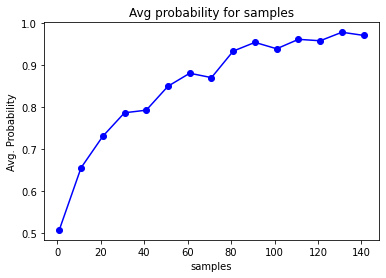

d) At about 110 samples we can safely say we have reached 95% confidence

In [ ]:
import math
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

# plotting
# plotting the graph
def plotter(valueMap, labelX, labelY, name, colour):
  myList = valueMap.items()
  x, y = zip(*myList)

  plt.title(name)
  #plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9 , 1.0])
  plt.xlabel(labelX)
  plt.ylabel(labelY)
  #plt.locator_params(axis='y', nbins=6)
  plt.plot(x, y, marker = 'o', color = colour)
 
  plt.show()

def find_likelihood(x):
  oneUponRoot2pi = 1/(math.sqrt(2*math.pi))
  pdf1Term2 = math.exp((-x**2)/2)
  pdf2Term2 = math.exp((-x**2)/18)
  density1 = 0.5 * oneUponRoot2pi * pdf1Term2
  density2 = 0.5 * (oneUponRoot2pi / 3) * pdf2Term2

  #print(p_of_sample_from_pdf1, p_of_sample_from_pdf2)
  l1 = np.log(density1 + density2)
  l2 = scipy.stats.norm.logpdf(x, 0, math.sqrt(5))
  #print(l1, l2)
  return (l1, l2)

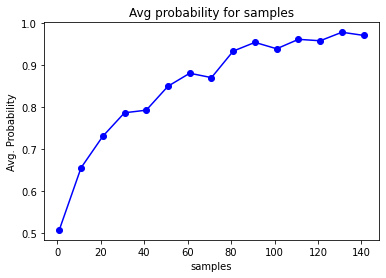

In [ ]:
import numpy as np
import random

def generate_sample():
  rand_num = random.uniform(0, 1)

  A = 0
  if rand_num <= 0.5:
    A = np.random.normal(0, 1)

  else:
    A = np.random.normal(0, 3)

  return A

def posterior_computer(total_samples_to_generate):
  samples = []
  samples_generated = 0
  while samples_generated < total_samples_to_generate:
    samples_generated += 1
    samples.append(generate_sample())

  #bayesian update after every sample
  prior = random.uniform(0, 1)
  likelihoods = []
  evidences = []
  sum_of_l1 = 0
  sum_of_l2 = 0

  for sample in samples:
     (l1,l2) = find_likelihood(sample)
     sum_of_l1 += l1
     sum_of_l2 += l2
     #likelihoods.append(l)
     #evidences.append(e)
  #print(prior/total_samples_to_generate)

  return math.exp(sum_of_l1) / (math.exp(sum_of_l1) + math.exp(sum_of_l2))

samplesToProbability = {}
total_trials = 100
for samples in range(1, 150, 10):
  posterior = 0
  for trials in range(1, total_trials, 1):
    posterior += posterior_computer(samples)
  
  samplesToProbability[samples] = (posterior / total_trials)
  #print(posterior / total_trials)
#controller(40)
plotter(samplesToProbability, 'samples', 'Avg. Probability', 'Avg probability for samples', 'blue')